In [12]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from path import Path
%matplotlib inline


In [13]:
# loading dataset into a pandas data frame using read_csv available with pandas

Comcast_file = pd.read_csv("D:\SIMPLIEARN\Data science with PHYTON\Project\Aradhna PYTHON Project\Comcast_telecom_complaints_data.csv")

In [14]:
## Look at the head, and do a describe on the dataset
Comcast_file.head() 

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [15]:
Comcast_file.describe() 

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [16]:
Comcast_file.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [17]:
Comcast_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [18]:
## Analysis Task 1 : Provide a trend chart for the number of complaints at monthly and daily granularity levels
## Daily Granualrity
Comcast_file["date_time"] = Comcast_file["Date_month_year"]+ " " + Comcast_file["Time"]
Comcast_file["date_time"]

0        22-Apr-15 3:53:50 PM
1       04-Aug-15 10:22:56 AM
2        18-Apr-15 9:55:47 AM
3       05-Jul-15 11:59:35 AM
4        26-May-15 1:25:26 PM
                ...          
2219     04-Feb-15 9:13:18 AM
2220     06-Feb-15 1:24:39 PM
2221     06-Sep-15 5:28:41 PM
2222    23-Jun-15 11:13:30 PM
2223    24-Jun-15 10:28:33 PM
Name: date_time, Length: 2224, dtype: object

In [19]:
Comcast_file["date_time"]= pd.to_datetime(Comcast_file["date_time"])
Comcast_file["Date_month_year"]= pd.to_datetime(Comcast_file["Date_month_year"])

In [20]:
Comcast_file.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_time                      datetime64[ns]
dtype: object

In [21]:
Comcast_file = Comcast_file.set_index(Comcast_file["date_time"])
Comcast_file.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_time
date_time,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-2015,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-2015,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-2015,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47


In [24]:
Comcast_file[["2015-6"]]

KeyError: "None of [Index(['2015-6'], dtype='object')] are in the [columns]"

In [25]:
Comcast_file["Date_month_year"].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-17      7
2015-12-05      7
2015-05-04      6
2015-11-04      5
2015-03-05      5
Name: Date_month_year, Length: 91, dtype: int64

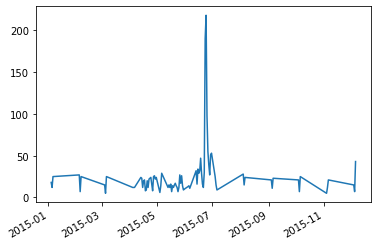

In [26]:
Comcast_file["Date_month_year"].value_counts().plot();

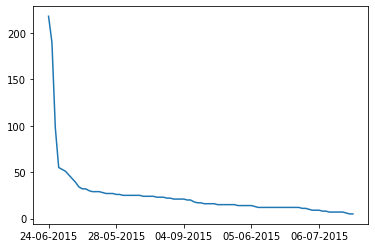

In [27]:
Comcast_file["Date"].value_counts().plot();

In [28]:
f = Comcast_file.groupby(pd.Grouper(freq="M")).size()
f.head()

date_time
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64

<AxesSubplot:xlabel='date_time'>

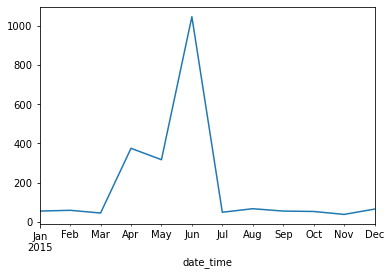

In [29]:
Comcast_file.groupby(pd.Grouper(freq="M")).size().plot()

In [30]:
Comcast_file["Customer Complaint"].value_counts().head(20)

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Data Caps                   11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast internet             8
Comcast data caps            8
Comcast/Xfinity              8
Comcast data cap             8
Data Cap                     8
Internet speed               8
Comcast Service              6
Comcast service              6
COMCAST                      6
Billing                      6
Comcast billing              6
Comcast complaint            5
Name: Customer Complaint, dtype: int64

In [31]:
## Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and 
## Closed & Solved is to be categorized as Closed.
Comcast_file.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [32]:
Comcast_file["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in Comcast_file["Status"]]

In [33]:
Comcast_file.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_time,newStatus
date_time,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-2015,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-2015,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-2015,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-2015,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


In [34]:
## Which state has the maximum complaints

Comcast_file.groupby(["State"]).size().sort_values(ascending = False)

State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
New Hampshire            12
Connecticut              12
Delaware                 12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

In [35]:
## Which state has the highest percentage of unresolved complaints
unresolved_complaints = Comcast_file.groupby(["State","newStatus"]).size().unstack().fillna(0)
unresolved_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [36]:
unresolved_complaints.max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

In [37]:
unresolved_complaints.sum()

newStatus
Closed    1707.0
Open       517.0
dtype: float64

In [38]:
Comcast_file.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

<AxesSubplot:ylabel='State'>

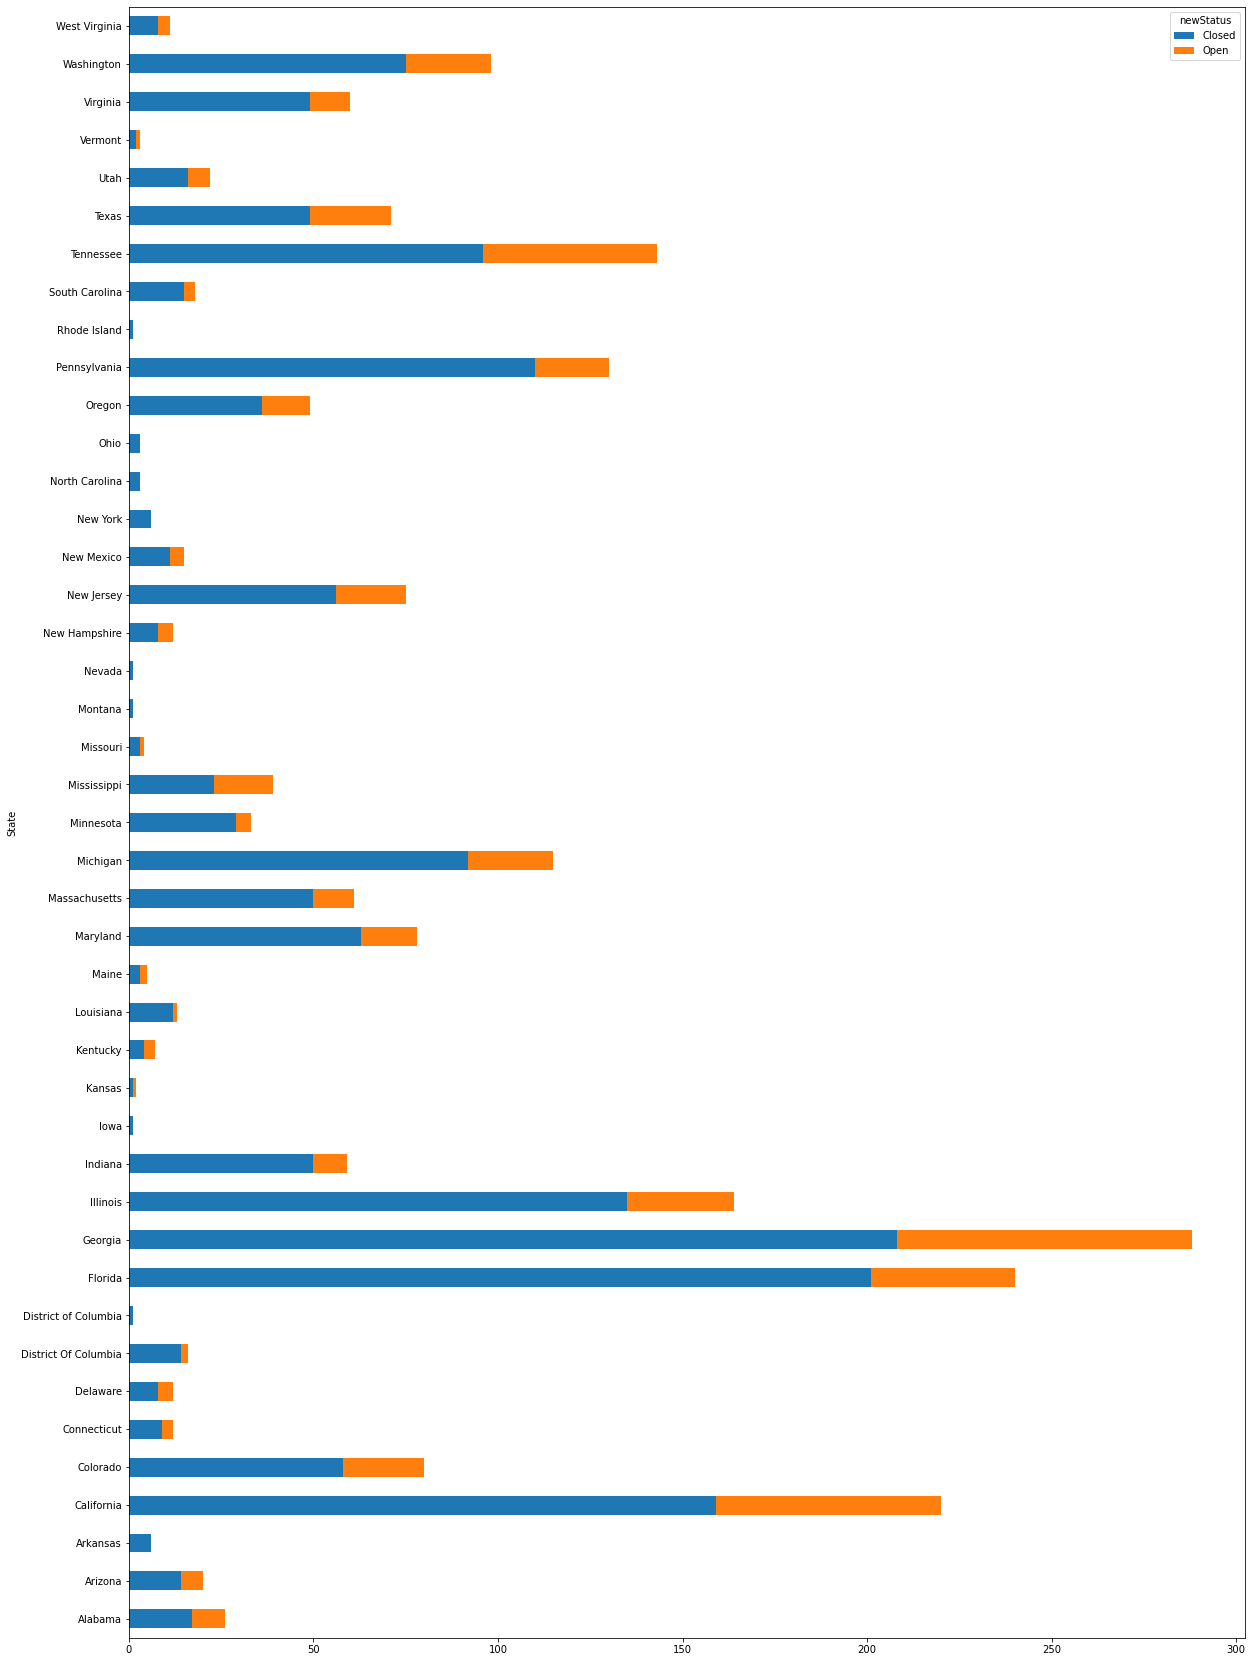

In [39]:
## Which state has the highest percentage of unresolved complaints
unresolved_complaints.plot(kind="barh", figsize=(20,30), stacked=True)

In [40]:
### Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
!pip install wordcloud

In [41]:
from wordcloud import WordCloud, STOPWORDS

In [42]:
Types_complaints = Comcast_file["Customer Complaint"].values
Types_complaints

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [43]:
wc = WordCloud(width=200, height=100, background_color= "black", stopwords= STOPWORDS).generate(str(Types_complaints))

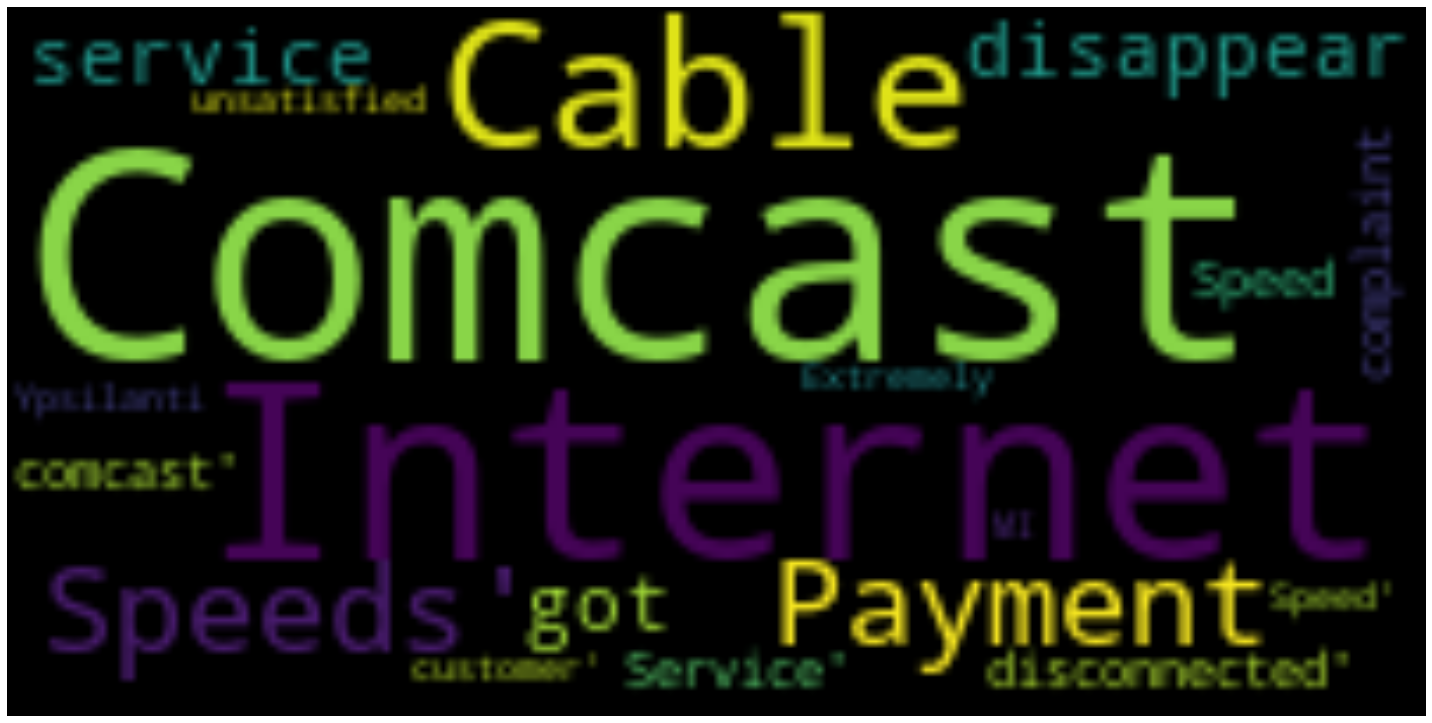

In [44]:
fig = plt.figure (figsize = (20,20),facecolor = "w", edgecolor = "k")
plt.imshow(wc,interpolation= "bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

In [45]:
Comcast_file["Received Via"].value_counts().head()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [46]:
resolved_complaints = Comcast_file.groupby(["Received Via","newStatus"]).size().unstack().fillna(0)
resolved_complaints

newStatus,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [47]:
!pip install nltk

In [48]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [49]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [50]:
doc_complete = Comcast_file["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [51]:
import gensim
from gensim import corpora

ModuleNotFoundError: No module named 'gensim'

In [52]:
Comcast_file["Customer Complaint"].tolist()

['Comcast Cable Internet Speeds',
 'Payment disappear - service got disconnected',
 'Speed and Service',
 'Comcast Imposed a New Usage Cap of 300GB that punishes streaming.',
 'Comcast not working and no service to boot',
 'ISP Charging for arbitrary data limits with overage fees',
 'Throttling service and unreasonable data caps',
 'Comcast refuses to help troubleshoot and correct my service.',
 'Comcast extended outages',
 'Comcast Raising Prices and Not Being Available To Ask Why',
 'Billing after service was asked to be disconnected',
 'YAHOO FAILURE TO RESTORE EMAIL SEARCH FEATURE',
 'Comcast Violating Open Internet Rules by Blocking HBO Go Access on Sony Consoles',
 'Internet speed',
 'Internet Disconnects Every Night',
 'Internet complaint',
 'Internet Availability and Speed',
 'Comcast owes me $65 and claims I need to return equipment I never had',
 'Horrible Internet Service',
 'Failure to provide services that I am billed for.',
 'Internet out all the time but they have a mono

In [53]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

NameError: name 'corpora' is not defined